In [241]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import catboost


In [242]:
import matplotlib.pyplot as plt

In [243]:
#data = pd.read_csv('전처리_2차_without_current.csv')
data = pd.read_csv('train_전처리_0909_without_current.csv')
#data = data[data['covid_impact'] == 0]
data = data.drop(['covid_impact', 'int_rate'], axis=1)
data['target'] = data['target'] > 0
data

,num_actv_rev_tl,dti,fico_range_low,funded_amnt,grade,emp_title,annual_inc,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,...,collections_12_mths_ex_med,spline_segment_1,spline_segment_2,spline_segment_3,spline_segment_4,spline_segment_5,spline_segment_6,spline_segment_7,irr,target
0,6.0,17.74,820.0,16000.0,0.0,-33.819993,65000.0,True,False,False,...,0.0,1.0,0.2,0.0,0.0,0.0,0.0,0.0,-26.21,False
1,3.0,6.99,700.0,4500.0,1.0,-19.626818,50000.0,True,False,False,...,0.0,1.0,0.6,0.4,0.0,0.0,0.0,0.0,10.94,True
2,10.0,28.94,675.0,20000.0,1.0,-11.726184,60000.0,False,True,False,...,0.0,1.0,0.6,0.4,0.0,0.0,0.0,0.0,10.46,True
3,13.0,17.69,660.0,30000.0,3.0,-30.077115,65000.0,False,False,True,...,0.0,1.0,0.0,0.0,0.4,0.6,0.0,0.0,-38.15,False
4,3.0,9.70,675.0,6025.0,0.0,-21.393000,50000.0,False,True,False,...,0.0,1.0,0.8,0.0,0.0,0.0,0.0,0.0,8.80,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076074,5.0,37.97,760.0,21650.0,3.0,-19.698356,90000.0,True,False,False,...,0.0,1.0,0.0,0.0,0.4,0.6,0.0,0.0,20.73,True
1076075,1.0,15.06,725.0,34000.0,3.0,-14.525660,95000.0,False,False,True,...,0.0,1.0,0.0,0.0,0.2,0.8,0.0,0.0,19.40,True
1076076,3.0,21.00,765.0,22550.0,0.0,-14.525660,53000.0,False,True,False,...,0.0,1.0,0.8,0.0,0.0,0.0,0.0,0.0,8.18,True
1076077,4.0,34.47,670.0,10000.0,3.0,-13.304217,35000.0,False,True,False,...,0.0,1.0,0.0,0.0,0.8,0.2,0.0,0.0,-41.58,False


In [244]:
y = data['target']
X = data.drop(['target'], axis=1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 0.9)
x_train.drop(['total_pymnt', 'irr'], axis = 1, inplace=True)
x_train

,num_actv_rev_tl,dti,fico_range_low,funded_amnt,grade,emp_title,annual_inc,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,...,home_ownership_RENT,delinq_2yrs,collections_12_mths_ex_med,spline_segment_1,spline_segment_2,spline_segment_3,spline_segment_4,spline_segment_5,spline_segment_6,spline_segment_7
199244,4.0,33.17,680.0,8000.0,3.0,-10.864918,28000.0,False,False,True,...,False,0.0,0.0,1.0,0.0,0.0,0.8,0.2,0.0,0.0
119812,8.0,19.02,710.0,8475.0,0.0,-15.669556,27000.0,True,False,False,...,False,0.0,0.0,1.0,0.2,0.0,0.0,0.0,0.0,0.0
864210,8.0,11.20,670.0,35000.0,2.0,-20.997817,85000.0,True,False,False,...,False,1.0,0.0,1.0,0.0,0.2,0.8,0.0,0.0,0.0
630439,5.0,20.53,735.0,13000.0,0.0,-24.384866,51000.0,False,False,True,...,False,0.0,0.0,1.0,0.6,0.0,0.0,0.0,0.0,0.0
665189,5.0,18.31,725.0,10000.0,1.0,-14.525660,35000.0,True,False,False,...,True,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,6.0,29.15,685.0,9050.0,2.0,-12.923784,35000.0,True,False,False,...,False,0.0,0.0,1.0,0.0,0.6,0.4,0.0,0.0,0.0
259178,4.0,13.68,660.0,4200.0,2.0,-15.333697,73500.0,False,True,False,...,False,2.0,0.0,1.0,0.0,0.8,0.2,0.0,0.0,0.0
131932,3.0,18.62,725.0,35000.0,2.0,-14.525660,145000.0,False,False,True,...,False,0.0,0.0,1.0,0.0,0.4,0.6,0.0,0.0,0.0
671155,1.0,15.25,705.0,14375.0,4.0,-33.819993,45000.0,False,False,True,...,False,0.0,0.0,1.0,0.0,0.0,0.0,0.6,0.4,0.0


In [246]:
model = catboost.CatBoostClassifier(random_state=42, max_depth=10).fit(x_train, y_train)
#model = RandomForestClassifier(random_state=42, max_depth=10).fit(x_train, y_train)
#model = XGBClassifier(random_state=42, max_depth=10).fit(x_train, y_train)

Learning rate set to 0.194085
0:	learn: 0.5881756	total: 132ms	remaining: 2m 11s
1:	learn: 0.5269125	total: 216ms	remaining: 1m 47s
2:	learn: 0.4910833	total: 281ms	remaining: 1m 33s
3:	learn: 0.4674619	total: 367ms	remaining: 1m 31s
4:	learn: 0.4540211	total: 447ms	remaining: 1m 29s
5:	learn: 0.4444642	total: 538ms	remaining: 1m 29s
6:	learn: 0.4384476	total: 616ms	remaining: 1m 27s
7:	learn: 0.4345631	total: 696ms	remaining: 1m 26s
8:	learn: 0.4317728	total: 767ms	remaining: 1m 24s
9:	learn: 0.4298561	total: 867ms	remaining: 1m 25s
10:	learn: 0.4280480	total: 941ms	remaining: 1m 24s
11:	learn: 0.4269023	total: 1.03s	remaining: 1m 24s
12:	learn: 0.4261239	total: 1.1s	remaining: 1m 23s
13:	learn: 0.4254067	total: 1.18s	remaining: 1m 22s
14:	learn: 0.4248398	total: 1.28s	remaining: 1m 24s
15:	learn: 0.4243825	total: 1.44s	remaining: 1m 28s
16:	learn: 0.4240555	total: 1.53s	remaining: 1m 28s
17:	learn: 0.4237346	total: 1.62s	remaining: 1m 28s
18:	learn: 0.4234760	total: 1.73s	remaining: 

In [249]:
predict = model.predict(x_test.drop(['total_pymnt', 'irr'], axis = 1))
predict_proba = model.predict_proba(x_test.drop(['total_pymnt', 'irr'], axis = 1))
x_test['predict_proba'] = predict_proba[:, 1]
x_test

,num_actv_rev_tl,dti,fico_range_low,funded_amnt,grade,emp_title,annual_inc,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,...,collections_12_mths_ex_med,spline_segment_1,spline_segment_2,spline_segment_3,spline_segment_4,spline_segment_5,spline_segment_6,spline_segment_7,irr,predict_proba
582204,4.0,17.07,675.0,28000.0,1.0,-17.980261,104000.0,False,False,True,...,0.0,1.0,0.2,0.8,0.0,0.0,0.0,0.0,12.12,0.868910
829500,8.0,22.71,705.0,30000.0,4.0,-14.525660,78000.0,False,False,True,...,0.0,1.0,0.0,0.0,0.0,0.8,0.2,0.0,23.14,0.803510
588659,1.0,1.20,760.0,10000.0,0.0,-17.980261,107400.0,False,False,True,...,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,7.49,0.974882
869929,3.0,17.37,715.0,32000.0,2.0,-14.525660,70000.0,False,True,False,...,0.0,1.0,0.0,0.8,0.2,0.0,0.0,0.0,16.35,0.651672
443127,3.0,12.19,665.0,8000.0,4.0,-14.779653,103400.0,False,False,True,...,0.0,1.0,0.0,0.0,0.0,0.2,0.8,0.0,29.64,0.780947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271272,7.0,11.93,665.0,8000.0,2.0,-23.708157,85000.0,False,True,False,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,-14.65,0.870630
142105,5.0,14.82,680.0,10000.0,1.0,-14.525660,114400.0,False,True,False,...,0.0,1.0,0.2,0.8,0.0,0.0,0.0,0.0,12.16,0.881112
337121,2.0,2.49,760.0,1500.0,2.0,-14.525660,38000.0,True,False,False,...,0.0,1.0,0.0,0.8,0.2,0.0,0.0,0.0,14.36,0.922722
89797,3.0,11.52,690.0,11725.0,4.0,-14.525660,95000.0,False,True,False,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,21.93,0.745465


In [250]:
threshold_list = []
profit_list = []
for i in range(1001):
    threshold = i/1000
    threshold_list.append(threshold)
    profit_list.append(x_test[x_test['predict_proba']>threshold]['total_pymnt'].sum() - x_test[x_test['predict_proba']>threshold]['funded_amnt'].sum())
    print(f'threshold = {threshold}, return: {x_test[x_test['predict_proba']>threshold]['total_pymnt'].sum() - x_test[x_test['predict_proba']>threshold]['funded_amnt'].sum()}')

optimal_threshold = np.array(profit_list).argmax()
print(optimal_threshold)

threshold = 0.0, return: 68943230.99097228
threshold = 0.001, return: 68943230.99097228
threshold = 0.002, return: 68943230.99097228
threshold = 0.003, return: 68943230.99097228
threshold = 0.004, return: 68943230.99097228
threshold = 0.005, return: 68943230.99097228
threshold = 0.006, return: 68943230.99097228
threshold = 0.007, return: 68943230.99097228
threshold = 0.008, return: 68943230.99097228
threshold = 0.009, return: 68943230.99097228
threshold = 0.01, return: 68943230.99097228
threshold = 0.011, return: 68943230.99097228
threshold = 0.012, return: 68943230.99097228
threshold = 0.013, return: 68943230.99097228
threshold = 0.014, return: 68943230.99097228
threshold = 0.015, return: 68943230.99097228
threshold = 0.016, return: 68943230.99097228
threshold = 0.017, return: 68943230.99097228
threshold = 0.018, return: 68943230.99097228
threshold = 0.019, return: 68943230.99097228
threshold = 0.02, return: 68943230.99097228
threshold = 0.021, return: 68943230.99097228
threshold = 0.

In [252]:
#수익성이 있다. 대출을 해줘도 되는 경우.
#target이 1인 경우 이 사람은 대출을 잘 갚아 회사에게 도움이 됨
#target이 0인 경우 이 사람은 대출을 잘 갚지 않아 사람에게 피해가 됨

#predict이 1인 경우 이 사람은 대출을 잘 갚을것이라고 예측한 경우
#predict이 0인 경우 이 사람은 대출을 잘 갚지 않을 것이라 예측함

In [253]:
x_test['target'] = y_test

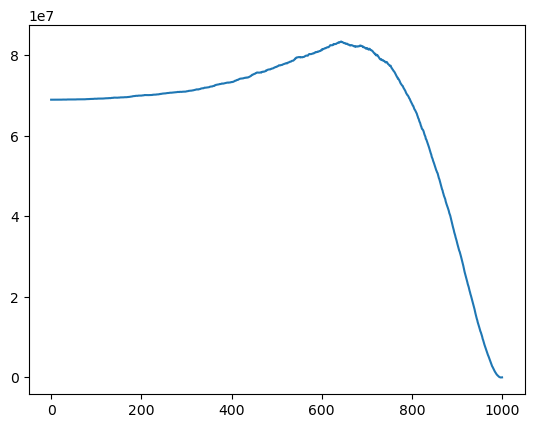

In [254]:
plt.plot(profit_list)

# 모델을 적용하고 변화 > 204254277만큼 이득

In [255]:
#모델 적용 전

In [256]:
df = pd.read_csv('test_전처리_0909_without_current.csv')
#df = df[df['covid_impact'] == 0]
df = df.drop(['covid_impact', 'int_rate'], axis=1)
df

,num_actv_rev_tl,dti,fico_range_low,funded_amnt,grade,emp_title,annual_inc,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,...,collections_12_mths_ex_med,spline_segment_1,spline_segment_2,spline_segment_3,spline_segment_4,spline_segment_5,spline_segment_6,spline_segment_7,irr,target
0,6.0,8.72,735.0,2400.0,2.0,-34.081908,12252.0,True,False,False,...,0.0,1.0,0.0,0.2,0.8,0.0,0.0,0.0,17.18,16.798714
1,6.0,20.00,690.0,10000.0,2.0,-16.541119,49200.0,False,True,False,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,14.36,13.978714
2,5.0,11.20,730.0,5000.0,0.0,-16.541119,36000.0,False,True,False,...,0.0,1.0,0.6,0.0,0.0,0.0,0.0,0.0,8.20,7.818714
3,6.0,5.35,660.0,3000.0,4.0,-16.541119,48000.0,False,True,False,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,20.32,19.938714
4,5.0,12.56,705.0,3000.0,1.0,0.857037,15000.0,False,True,False,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,10.38,9.998714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722735,5.0,21.23,675.0,25000.0,3.0,-14.902324,141000.0,True,False,False,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,18.38,16.564750
722736,11.0,30.65,675.0,24500.0,4.0,-16.541119,59716.0,False,False,True,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,25.27,23.454750
722737,6.0,26.50,665.0,25275.0,5.0,-28.459668,98000.0,True,False,False,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,32.78,30.964750
722738,9.0,25.10,670.0,19200.0,2.0,-16.302899,70000.0,True,False,False,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,13.51,11.694750


In [257]:
df['risk_free'] =df['irr'] - df['target']
df['risk_free'] = df['risk_free'] / 100
term60return = df[df['term_ 60 months'] == 1].copy()
term60return['riskfreereturn'] = (term60return['funded_amnt'] * (1 + term60return['risk_free'])**5) - term60return['funded_amnt']
term60return['riskfreereturn'] = (term60return['riskfreereturn']).round()

term36return = df[df['term_ 60 months'] == 0].copy()
term36return['riskfreereturn'] = (term36return['funded_amnt'] * (1 + term36return['risk_free'])**5) - term36return['funded_amnt']
term36return['riskfreereturn'] = (term36return['riskfreereturn']).round()

df = pd.concat([term60return, term36return])
df

,num_actv_rev_tl,dti,fico_range_low,funded_amnt,grade,emp_title,annual_inc,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,...,spline_segment_2,spline_segment_3,spline_segment_4,spline_segment_5,spline_segment_6,spline_segment_7,irr,target,risk_free,riskfreereturn
544514,6.0,5.55,675.0,5600.0,5.0,-34.081908,40000.0,False,True,False,...,0.0,0.0,0.0,0.0,0.888889,0.111111,-99.99,-100.878048,0.008880,253.0
544515,6.0,16.12,695.0,6500.0,2.0,-16.541119,72000.0,True,False,False,...,0.0,0.6,0.4,0.0,0.000000,0.000000,15.68,14.791952,0.008880,294.0
544516,6.0,26.53,725.0,20250.0,2.0,-16.541119,43370.0,False,False,True,...,0.0,0.4,0.6,0.0,0.000000,0.000000,16.39,15.501952,0.008880,915.0
544517,6.0,16.04,735.0,12500.0,1.0,-16.541119,27000.0,False,False,True,...,0.2,0.8,0.0,0.0,0.000000,0.000000,13.46,12.571952,0.008880,565.0
544518,6.0,20.52,665.0,16000.0,4.0,-16.541119,81000.0,False,False,True,...,0.0,0.0,0.0,0.4,0.600000,0.000000,21.83,20.941952,0.008880,723.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544509,10.0,22.05,660.0,8000.0,2.0,-3.041875,48000.0,False,False,True,...,0.0,0.6,0.4,0.0,0.000000,0.000000,-51.17,-52.605200,0.014352,591.0
544510,6.0,32.44,665.0,25350.0,3.0,-16.541119,180000.0,False,False,True,...,0.0,0.0,0.2,0.8,0.000000,0.000000,-100.00,-101.435200,0.014352,1872.0
544511,15.0,28.76,665.0,19150.0,2.0,-34.081908,43560.0,True,False,False,...,0.0,0.2,0.8,0.0,0.000000,0.000000,-99.97,-101.405200,0.014352,1414.0
544512,4.0,17.04,680.0,3675.0,0.0,-16.541119,45000.0,True,False,False,...,0.8,0.0,0.0,0.0,0.000000,0.000000,-51.23,-52.665200,0.014352,271.0


In [258]:
df['target'] = df['target'] > 0
df

,num_actv_rev_tl,dti,fico_range_low,funded_amnt,grade,emp_title,annual_inc,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,...,spline_segment_2,spline_segment_3,spline_segment_4,spline_segment_5,spline_segment_6,spline_segment_7,irr,target,risk_free,riskfreereturn
544514,6.0,5.55,675.0,5600.0,5.0,-34.081908,40000.0,False,True,False,...,0.0,0.0,0.0,0.0,0.888889,0.111111,-99.99,False,0.008880,253.0
544515,6.0,16.12,695.0,6500.0,2.0,-16.541119,72000.0,True,False,False,...,0.0,0.6,0.4,0.0,0.000000,0.000000,15.68,True,0.008880,294.0
544516,6.0,26.53,725.0,20250.0,2.0,-16.541119,43370.0,False,False,True,...,0.0,0.4,0.6,0.0,0.000000,0.000000,16.39,True,0.008880,915.0
544517,6.0,16.04,735.0,12500.0,1.0,-16.541119,27000.0,False,False,True,...,0.2,0.8,0.0,0.0,0.000000,0.000000,13.46,True,0.008880,565.0
544518,6.0,20.52,665.0,16000.0,4.0,-16.541119,81000.0,False,False,True,...,0.0,0.0,0.0,0.4,0.600000,0.000000,21.83,True,0.008880,723.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544509,10.0,22.05,660.0,8000.0,2.0,-3.041875,48000.0,False,False,True,...,0.0,0.6,0.4,0.0,0.000000,0.000000,-51.17,False,0.014352,591.0
544510,6.0,32.44,665.0,25350.0,3.0,-16.541119,180000.0,False,False,True,...,0.0,0.0,0.2,0.8,0.000000,0.000000,-100.00,False,0.014352,1872.0
544511,15.0,28.76,665.0,19150.0,2.0,-34.081908,43560.0,True,False,False,...,0.0,0.2,0.8,0.0,0.000000,0.000000,-99.97,False,0.014352,1414.0
544512,4.0,17.04,680.0,3675.0,0.0,-16.541119,45000.0,True,False,False,...,0.8,0.0,0.0,0.0,0.000000,0.000000,-51.23,False,0.014352,271.0


In [259]:
test_prob = model.predict_proba(df.drop(['irr', 'target', 'total_pymnt', 'risk_free', 'riskfreereturn'], axis=1))

In [260]:
df['predict_proba'] = test_prob[:, 1]
df

,num_actv_rev_tl,dti,fico_range_low,funded_amnt,grade,emp_title,annual_inc,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,...,spline_segment_3,spline_segment_4,spline_segment_5,spline_segment_6,spline_segment_7,irr,target,risk_free,riskfreereturn,predict_proba
544514,6.0,5.55,675.0,5600.0,5.0,-34.081908,40000.0,False,True,False,...,0.0,0.0,0.0,0.888889,0.111111,-99.99,False,0.008880,253.0,0.764917
544515,6.0,16.12,695.0,6500.0,2.0,-16.541119,72000.0,True,False,False,...,0.6,0.4,0.0,0.000000,0.000000,15.68,True,0.008880,294.0,0.830316
544516,6.0,26.53,725.0,20250.0,2.0,-16.541119,43370.0,False,False,True,...,0.4,0.6,0.0,0.000000,0.000000,16.39,True,0.008880,915.0,0.714872
544517,6.0,16.04,735.0,12500.0,1.0,-16.541119,27000.0,False,False,True,...,0.8,0.0,0.0,0.000000,0.000000,13.46,True,0.008880,565.0,0.516403
544518,6.0,20.52,665.0,16000.0,4.0,-16.541119,81000.0,False,False,True,...,0.0,0.0,0.4,0.600000,0.000000,21.83,True,0.008880,723.0,0.664044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544509,10.0,22.05,660.0,8000.0,2.0,-3.041875,48000.0,False,False,True,...,0.6,0.4,0.0,0.000000,0.000000,-51.17,False,0.014352,591.0,0.851116
544510,6.0,32.44,665.0,25350.0,3.0,-16.541119,180000.0,False,False,True,...,0.0,0.2,0.8,0.000000,0.000000,-100.00,False,0.014352,1872.0,0.451924
544511,15.0,28.76,665.0,19150.0,2.0,-34.081908,43560.0,True,False,False,...,0.2,0.8,0.0,0.000000,0.000000,-99.97,False,0.014352,1414.0,0.459592
544512,4.0,17.04,680.0,3675.0,0.0,-16.541119,45000.0,True,False,False,...,0.0,0.0,0.0,0.000000,0.000000,-51.23,False,0.014352,271.0,0.938041


In [261]:
df['predict'] = df['predict_proba'] > optimal_threshold * 0.001 # 수익을 최고로 만드는 threshold

df['target'] = df['target'] > 0


In [262]:
print(df[df['target']==0]['total_pymnt'].sum() - df[df['target']==0]['funded_amnt'].sum(), len(df[df['target']==0]['total_pymnt'].sum() - df[df['target']==0]['funded_amnt']))
print(df[df['target']==1]['total_pymnt'].sum() - df[df['target']==1]['funded_amnt'].sum(), len(df[df['target']==0]['total_pymnt'].sum() - df[df['target']==1]['funded_amnt']))

-987469237.2526565 128185
1450510302.8768005 594555


In [263]:
print(len(df[df['predict']==1]), df[df['predict']==1]['total_pymnt'].sum())

print(len(df[df['predict']==0]), df[df['predict']==0]['total_pymnt'].sum())


654129 9668053858.095474
68611 1202730082.5286763


In [264]:
print(df['total_pymnt'].sum() - df['funded_amnt'].sum(), '모델을 적용하지 않았을 때의 수익(음수인 경우 손실)')
print(df[df['predict']==1]['total_pymnt'].sum() - df[df['predict']==1]['funded_amnt'].sum(), '대출 분류로 얻은 수익')
print(len(df[df['predict']==0]), df[df['predict']==0]['riskfreereturn'].sum(), '모델이 거절한 대출의 돈으로 미국 국채에 투자한 수익')
print(df[df['predict']==1]['total_pymnt'].sum() - df[df['predict']==1]['funded_amnt'].sum() + df[df['predict']==0]['riskfreereturn'].sum(), '모델을 적용한 후의 총 수익(음수인 경우 손실)')



463041065.6241455 모델을 적용하지 않았을 때의 수익(음수인 경우 손실)
541230808.0954742 대출 분류로 얻은 수익
68611 109292703.0 모델이 거절한 대출의 돈으로 미국 국채에 투자한 수익
650523511.0954742 모델을 적용한 후의 총 수익(음수인 경우 손실)


In [265]:
109292703 + 535771413

645064116

In [266]:
6.33 / 4.45

1.4224719101123595

In [267]:
#기존 수익
df['total_pymnt'].sum() - df['funded_amnt'].sum()
#모델 저용 후 수익
df[df['predict']==1]['total_pymnt'].sum() - df[df['predict']==1]['funded_amnt'].sum() + df[df['predict']==0]['riskfreereturn'].sum()

#모델 적용 후 수익률이 몇퍼센트 증가했지?
(df[df['predict']==1]['total_pymnt'].sum() - df[df['predict']==1]['funded_amnt'].sum() + df[df['predict']==0]['riskfreereturn'].sum()) / (df['total_pymnt'].sum() - df['funded_amnt'].sum()) * 100

140.48937759302538

In [268]:
(df[df['predict']==1]['total_pymnt'].sum() - df[df['predict']==1]['funded_amnt'].sum() + df[df['predict']==0]['riskfreereturn'].sum() )/ df['funded_amnt'].sum()

0.06250380307319749

In [269]:
print(-(df[(df['predict'] == 0) & (df['target'] == 0)]['total_pymnt'].sum() - df[(df['predict'] == 0) & (df['target'] == 0)]['funded_amnt'].sum()), '대출을 해주면 안되는 사람 + 모델이 거절한 사람, 즉 모델이 대출을 잘 거부해서 증가한 수익', len(df[(df['predict'] == 0) & (df['target'] == 0)]), '명')
print(df[(df['predict'] == 0) & (df['target'] == 1)]['total_pymnt'].sum() - df[(df['predict'] == 0) & (df['target'] == 1)]['funded_amnt'].sum(), '대출을 해줘도 되는 사람 + 모델이 거부한 사람, 즉 대출을 갚을 수 있는 사람인데 모델이 잘 못 분류해서 얻은 손실', len(df[(df['predict'] == 0) & (df['target'] == 1)]), '명')
print(df[(df['predict'] == 1) & (df['target'] == 0)]['total_pymnt'].sum() - df[(df['predict'] == 1) & (df['target'] == 0)]['funded_amnt'].sum(), '대출을 해주면 안되는 사람 + 모델이 승인한 사람, 대출을 갚을 능력이 없는데 빌려줘서 얻은 손실(잘 못 빌려줘서 얻은 손실)', len(df[(df['predict'] == 1) & (df['target'] == 0)]), '명')
print((df[(df['predict'] == 1) & (df['target'] == 1)]['total_pymnt'].sum() - df[(df['predict'] == 1) & (df['target'] == 1)]['funded_amnt'].sum()), '대출을 해줘도 괜찮은 사람 + 모델이 승인한 사람, 잘 예측해서 얻은 수익', len(df[(df['predict'] == 1) & (df['target'] == 1)]), '명')

275392331.39801085 대출을 해주면 안되는 사람 + 모델이 거절한 사람, 즉 모델이 대출을 잘 거부해서 증가한 수익 27327 명
197202588.92668712 대출을 해줘도 되는 사람 + 모델이 거부한 사람, 즉 대출을 갚을 수 있는 사람인데 모델이 잘 못 분류해서 얻은 손실 41284 명
-712076905.8546456 대출을 해주면 안되는 사람 + 모델이 승인한 사람, 대출을 갚을 능력이 없는데 빌려줘서 얻은 손실(잘 못 빌려줘서 얻은 손실) 100858 명
1253307713.9501133 대출을 해줘도 괜찮은 사람 + 모델이 승인한 사람, 잘 예측해서 얻은 수익 553271 명


In [270]:
print(df['total_pymnt'].sum() - df['funded_amnt'].sum(), '모델을 적용하지 않았을 때의 수익(음수인 경우 손실)')
print(df[df['target']==1]['total_pymnt'].sum() - df[df['target']==1]['funded_amnt'].sum(), '완벽하게 예측한 모델의 수익(음수인 경우 손실)')
print(df[df['predict']==1]['total_pymnt'].sum() - df[df['predict']==1]['funded_amnt'].sum(), '모델을 적용한 후의 수익(음수인 경우 손실)')

print((df[df['predict']==1]['total_pymnt'].sum() - df[df['predict']==1]['funded_amnt'].sum()) - (df['total_pymnt'].sum() - df['funded_amnt'].sum()), '만큼의 수익성 개선이 일어남')

463041065.6241455 모델을 적용하지 않았을 때의 수익(음수인 경우 손실)
1450510302.8768005 완벽하게 예측한 모델의 수익(음수인 경우 손실)
541230808.0954742 모델을 적용한 후의 수익(음수인 경우 손실)
78189742.47132874 만큼의 수익성 개선이 일어남


In [271]:
print(len(df[(df['predict'] == 0) & (df['target'] == 0)]), '대출을 해주면 안되는 사람에게 안된다고 모델이 잘 예측한 경우의 갯수')
print(len(df[(df['predict'] == 0) & (df['target'] == 1)]), '대출을 해줘도 괜찮은데 모델에서 안된다고 해서 수익성을 떨어뜨린 경우의 갯수')
print(len(df[(df['predict'] == 1) & (df['target'] == 0)]), '대출을 해주면 안되는 사람에게 잘못 대출해줘서 수익성을 떨어뜨린 경우의 갯수')
print(len(df[(df['predict'] == 1) & (df['target'] == 1)]), '대출을 해줘야 하는 사람에게 모델이 잘 예측한 경우의 갯수')

27327 대출을 해주면 안되는 사람에게 안된다고 모델이 잘 예측한 경우의 갯수
41284 대출을 해줘도 괜찮은데 모델에서 안된다고 해서 수익성을 떨어뜨린 경우의 갯수
100858 대출을 해주면 안되는 사람에게 잘못 대출해줘서 수익성을 떨어뜨린 경우의 갯수
553271 대출을 해줘야 하는 사람에게 모델이 잘 예측한 경우의 갯수


In [272]:
len(df[df['predict']==1]), len(df[df['predict']==0])

(654129, 68611)

In [273]:
print(-(df[(df['predict'] == 0) & (df['target'] == 0)]['total_pymnt'].sum() - df[(df['predict'] == 0) & (df['target'] == 0)]['funded_amnt'].sum()).round(), '대출을 해주면 안되는 사람 + 모델이 거절한 사람, 즉 모델이 대출을 잘 거부해서 증가한 수익', len(df[(df['predict'] == 0) & (df['target'] == 0)]), '명')
print(-(df[(df['predict'] == 0) & (df['target'] == 1)]['total_pymnt'].sum() - df[(df['predict'] == 0) & (df['target'] == 1)]['funded_amnt'].sum()).round(), '대출을 해줘도 되는 사람 + 모델이 거부한 사람, 즉 대출을 갚을 수 있는 사람인데 모델이 잘 못 분류해서 얻은 손실', len(df[(df['predict'] == 0) & (df['target'] == 1)]), '명')
print((df[(df['predict'] == 1) & (df['target'] == 0)]['total_pymnt'].sum() - df[(df['predict'] == 1) & (df['target'] == 0)]['funded_amnt'].sum()).round(), '대출을 해주면 안되는 사람 + 모델이 승인한 사람, 대출을 갚을 능력이 없는데 빌려줘서 얻은 손실(잘 못 빌려줘서 얻은 손실)', len(df[(df['predict'] == 1) & (df['target'] == 0)]), '명')
print(((df[(df['predict'] == 1) & (df['target'] == 1)]['total_pymnt'].sum() - df[(df['predict'] == 1) & (df['target'] == 1)]['funded_amnt'].sum())).round(), '대출을 해줘도 괜찮은 사람 + 모델이 승인한 사람, 잘 예측해서 얻은 수익', len(df[(df['predict'] == 1) & (df['target'] == 1)]), '명')

275392331.0 대출을 해주면 안되는 사람 + 모델이 거절한 사람, 즉 모델이 대출을 잘 거부해서 증가한 수익 27327 명
-197202589.0 대출을 해줘도 되는 사람 + 모델이 거부한 사람, 즉 대출을 갚을 수 있는 사람인데 모델이 잘 못 분류해서 얻은 손실 41284 명
-712076906.0 대출을 해주면 안되는 사람 + 모델이 승인한 사람, 대출을 갚을 능력이 없는데 빌려줘서 얻은 손실(잘 못 빌려줘서 얻은 손실) 100858 명
1253307714.0 대출을 해줘도 괜찮은 사람 + 모델이 승인한 사람, 잘 예측해서 얻은 수익 553271 명


In [277]:
1450510302 - 987469237

463041065

In [276]:
1116056499 - 345557575 - 641911662 + 334453803

463041065

In [71]:
import shap
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(df[x_train.columns])


In [88]:
import pickle
# SHAP 값을 파일로 저장
with open('shap_values.pkl', 'wb') as f:
    pickle.dump(shap_values, f)

# explainer 객체도 저장할 수 있습니다 
with open('explainer.pkl', 'wb') as f:
    pickle.dump(explainer, f)

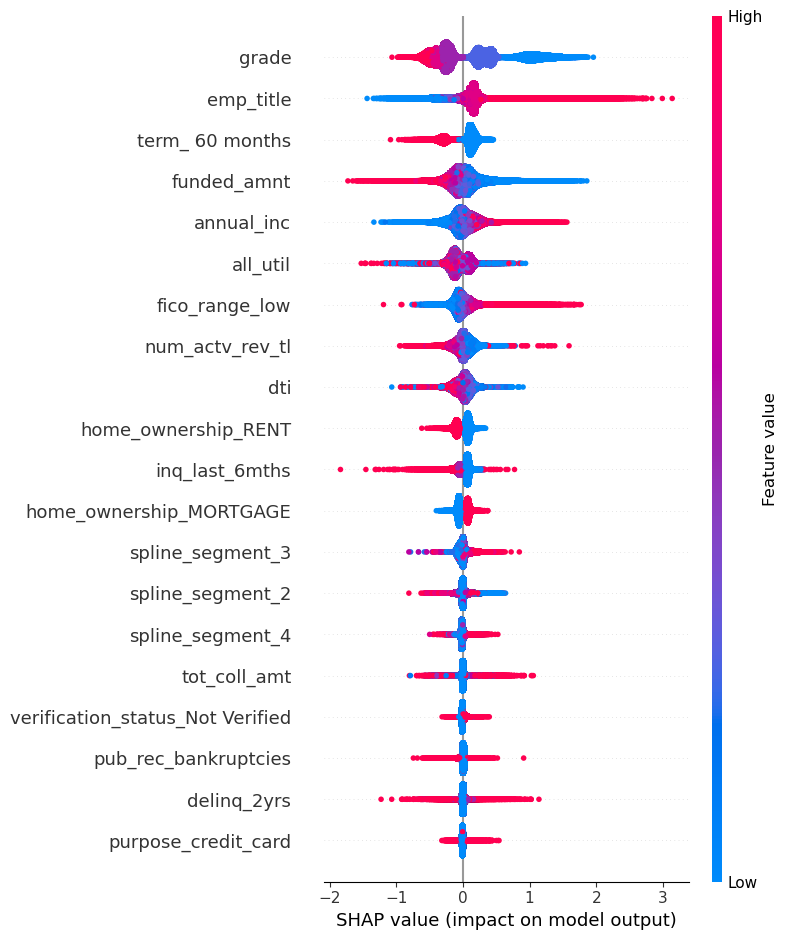

In [72]:
shap.summary_plot(shap_values, df[x_train.columns])


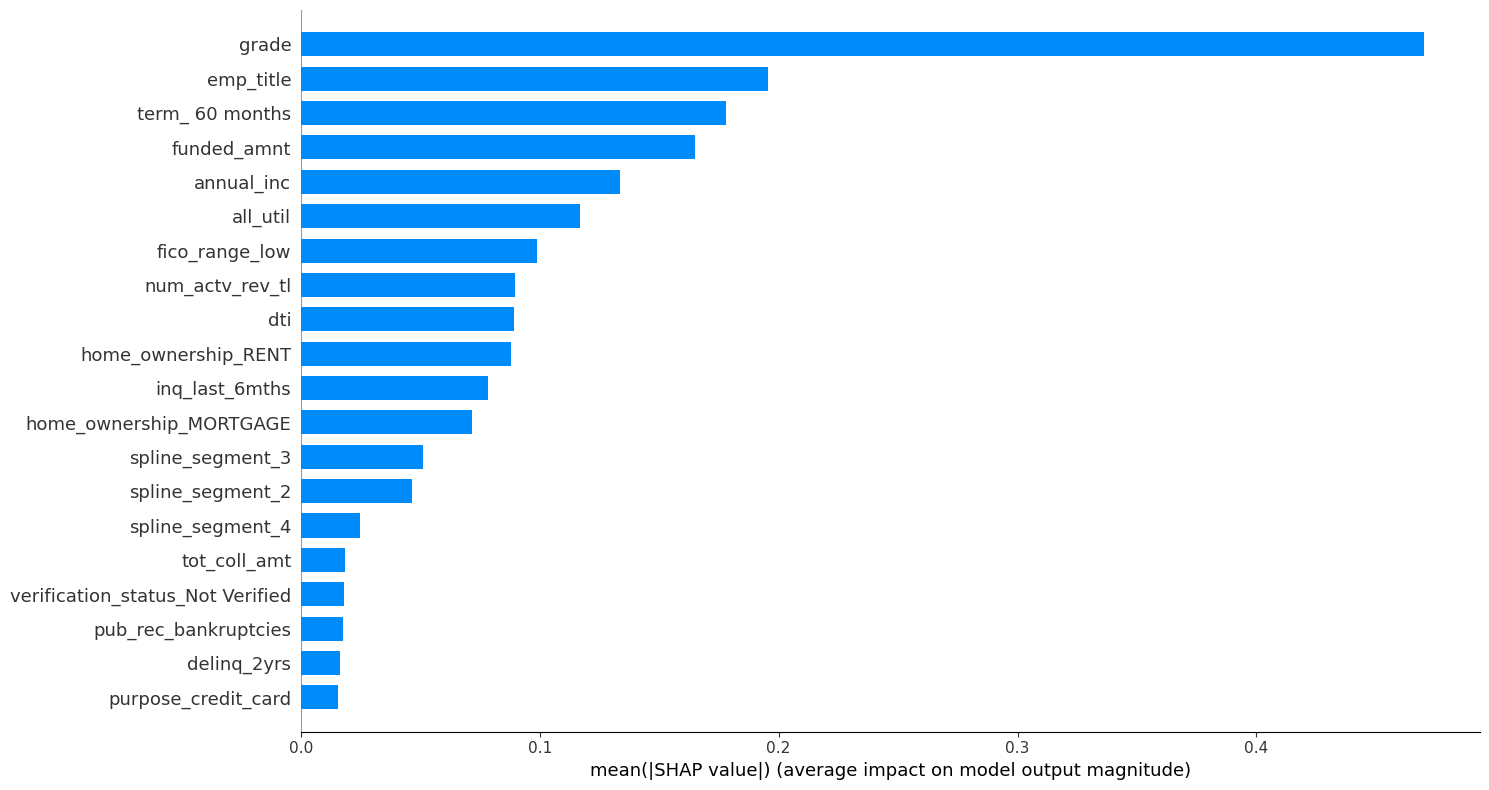

In [73]:
shap.summary_plot(shap_values, df[x_train.columns], plot_type='bar', plot_size=(15, 8))

In [74]:
df[x_train.columns]

,num_actv_rev_tl,dti,fico_range_low,funded_amnt,grade,emp_title,annual_inc,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,...,home_ownership_RENT,delinq_2yrs,collections_12_mths_ex_med,spline_segment_1,spline_segment_2,spline_segment_3,spline_segment_4,spline_segment_5,spline_segment_6,spline_segment_7
544514,6.0,5.55,675.0,5600.0,5.0,-34.081908,40000.0,False,True,False,...,False,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.888889,0.111111
544515,6.0,16.12,695.0,6500.0,2.0,-16.541119,72000.0,True,False,False,...,False,0.0,0.0,1.0,0.0,0.6,0.4,0.0,0.000000,0.000000
544516,6.0,26.53,725.0,20250.0,2.0,-16.541119,43370.0,False,False,True,...,True,0.0,0.0,1.0,0.0,0.4,0.6,0.0,0.000000,0.000000
544517,6.0,16.04,735.0,12500.0,1.0,-16.541119,27000.0,False,False,True,...,True,0.0,0.0,1.0,0.2,0.8,0.0,0.0,0.000000,0.000000
544518,6.0,20.52,665.0,16000.0,4.0,-16.541119,81000.0,False,False,True,...,True,0.0,0.0,1.0,0.0,0.0,0.0,0.4,0.600000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544509,10.0,22.05,660.0,8000.0,2.0,-3.041875,48000.0,False,False,True,...,True,0.0,0.0,1.0,0.0,0.6,0.4,0.0,0.000000,0.000000
544510,6.0,32.44,665.0,25350.0,3.0,-16.541119,180000.0,False,False,True,...,True,0.0,0.0,1.0,0.0,0.0,0.2,0.8,0.000000,0.000000
544511,15.0,28.76,665.0,19150.0,2.0,-34.081908,43560.0,True,False,False,...,True,0.0,0.0,1.0,0.0,0.2,0.8,0.0,0.000000,0.000000
544512,4.0,17.04,680.0,3675.0,0.0,-16.541119,45000.0,True,False,False,...,True,0.0,0.0,1.0,0.8,0.0,0.0,0.0,0.000000,0.000000


In [76]:
(df['funded_amnt'] - df['total_pymnt']).argmax()

34037

In [84]:
df.iloc[34037]['funded_amnt'] - df.iloc[34037]['total_pymnt']

40000.0

num_actv_rev_tl                              6.0
dti                                        18.42
fico_range_low                             725.0
funded_amnt                              40000.0
grade                                        2.0
emp_title                             -20.739157
annual_inc                              96812.43
verification_status_Not Verified           False
verification_status_Source Verified        False
verification_status_Verified                True
purpose_car                                False
purpose_credit_card                        False
purpose_debt_consolidation                 False
purpose_educational                        False
purpose_home_improvement                   False
purpose_house                              False
purpose_major_purchase                     False
purpose_medical                            False
purpose_moving                             False
purpose_other                               True
purpose_renewable_en

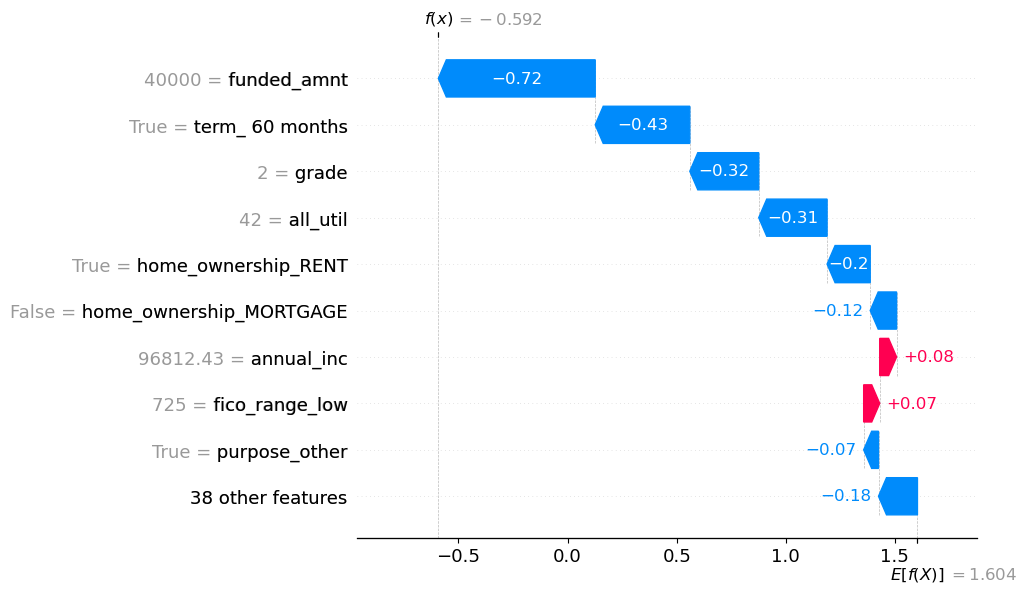

In [105]:
index = (df['funded_amnt'] - df['total_pymnt']).argmax()

print(df[x_train.columns].iloc[index, :])
print(f'{index}: funded_amnt - total_pymnt: {df.iloc[index]["funded_amnt"] - df.iloc[index]["total_pymnt"]}')
# Waterfall plot for a specific instance (replace 'index' with the row index of the instance)
shap.waterfall_plot(shap.Explanation(values=shap_values[index], 
                                     base_values=explainer.expected_value, 
                                     data=df[x_train.columns].iloc[index,:], 
                                     feature_names=x_train.columns))


num_actv_rev_tl                              8.0
dti                                        17.88
fico_range_low                             665.0
funded_amnt                              35000.0
grade                                        5.0
emp_title                             -10.850588
annual_inc                               72000.0
verification_status_Not Verified           False
verification_status_Source Verified        False
verification_status_Verified                True
purpose_car                                False
purpose_credit_card                        False
purpose_debt_consolidation                  True
purpose_educational                        False
purpose_home_improvement                   False
purpose_house                              False
purpose_major_purchase                     False
purpose_medical                            False
purpose_moving                             False
purpose_other                              False
purpose_renewable_en

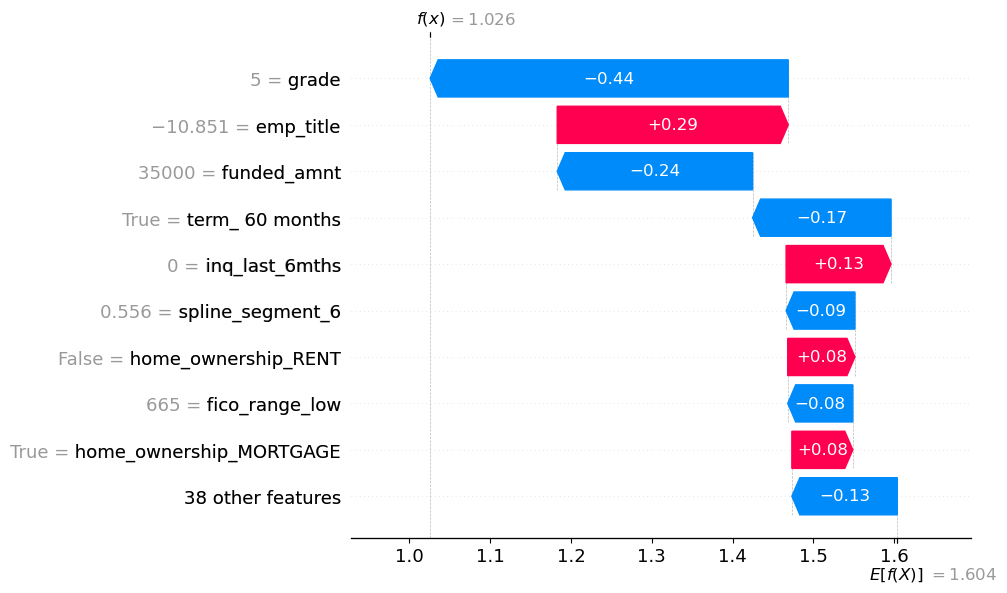

In [108]:
index = (df['funded_amnt'] - df['total_pymnt']).argmin()

print(df[x_train.columns].iloc[index, :])
print(f'{index}: funded_amnt - total_pymnt: {df.iloc[index]["funded_amnt"] - df.iloc[index]["total_pymnt"]}')
# Waterfall plot for a specific instance (replace 'index' with the row index of the instance)
shap.waterfall_plot(shap.Explanation(values=shap_values[index], 
                                     base_values=explainer.expected_value, 
                                     data=df[x_train.columns].iloc[index,:], 
                                     feature_names=x_train.columns))
